<a href="https://colab.research.google.com/github/srikarraju/GridWorld/blob/main/Natural_Actor_Critic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
import gym
from collections import deque
import numpy as np

In [ ]:
env = gym.make('CartPole-v0')
#policy = policy_net(env.observation_space.shape[0],100,env.action_space.n)
#value_fn = value_net(env.observation_space.shape[0])
#optimizer1 = torch.optim.Adam(policy.parameters())
#optimizer2 = torch.optim.Adam(value_fn.parameters())
#gamma = 0.99
returns = deque(maxlen=100)
weights_v = np.zeros(4,dtype=float)
weights_p = np.zeros(shape=(2,4),dtype=float)
weights_w = np.zeros(shape=(2,4),dtype=float)
print(weights_v)
print(weights_p)
print(weights_w)

[0. 0. 0. 0.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
alpha_0, beta_0, gamma, epsilon = 0.1, 0.01, 0.95, 0.1
alpha_c, beta_c = 1000, 100000
t = 0
n_episode = 1
actions_list = []
avg_reward = 0
episode_rewards = []

while n_episode <=500000:
  rewards,states,actions = [],[],[]
  state = env.reset()

  state = np.asarray(state)
  value_curr = np.dot(weights_v,state)
  #print(value_curr)

  while True:
    t += 1
    probs = np.dot(weights_p,np.asarray(state))
    probs -= probs.max()
    probs = np.exp(np.clip(probs/epsilon, -500, 500))
    probs /= probs.sum()

    probs2 = probs.cumsum()
    action = np.where(probs2 >= np.random.random())[0][0]
    #print(action)

    new_state, reward, done, info = env.step(action.item())


    value_curr = np.dot(weights_v,np.asarray(state))
    value_next = np.dot(weights_v,np.asarray(new_state))

    avg_reward = (1 - gamma)*avg_reward + gamma * reward

    td_error = reward + value_curr - value_next - avg_reward

    beta = (beta_0 * beta_c) / (beta_c + t)
    alpha = (alpha_0 * alpha_c) / (alpha_c + t**(2/3))

    weights_v += alpha * td_error * np.asarray(state)

    grad_prob = (1 - probs[action]) * np.asarray(state) #change this as probs is cum sum
    grad_prob2 = probs[1 - action] * np.asarray(state)

    weights_w[action] = np.dot((np.eye(4) - alpha * np.outer(grad_prob,grad_prob) ),weights_w[action]) + alpha * td_error * grad_prob
    weights_w[1 - action] = np.dot((np.eye(4) - alpha * np.outer(grad_prob2,grad_prob2) ),weights_w[1 - action]) + alpha * td_error * grad_prob

    weights_p[action] += beta * weights_w[action]
    weights_p[1 - action] += beta * weights_w[1 - action]

    states.append(state)
    actions.append(action)
    rewards.append(reward)
    actions_list.append(action)

    state = new_state
    if done==True:
      break

  returns.append(np.sum(rewards))
  episode_rewards.append(np.sum(rewards))
  #print(np.sum(rewards))
  if n_episode%100==0:
    print("Episode: {:6d}\tAvg. Return: {:6.2f}".format(n_episode, np.mean(returns)))
  #reinforce_baseline_returns.append(np.mean(returns))
  n_episode += 1

env.close()

Episode:    100	Avg. Return:  21.93
Episode:    200	Avg. Return:  23.61
Episode:    300	Avg. Return:  24.70
Episode:    400	Avg. Return:  21.11
Episode:    500	Avg. Return:  23.08
Episode:    600	Avg. Return:  23.63
Episode:    700	Avg. Return:  23.41
Episode:    800	Avg. Return:  25.04
Episode:    900	Avg. Return:  21.99
Episode:   1000	Avg. Return:  20.42
Episode:   1100	Avg. Return:  22.79
Episode:   1200	Avg. Return:  23.09
Episode:   1300	Avg. Return:  23.75
Episode:   1400	Avg. Return:  22.22
Episode:   1500	Avg. Return:  24.67
Episode:   1600	Avg. Return:  22.48
Episode:   1700	Avg. Return:  23.53
Episode:   1800	Avg. Return:  23.20
Episode:   1900	Avg. Return:  23.33
Episode:   2000	Avg. Return:  22.77
Episode:   2100	Avg. Return:  22.34
Episode:   2200	Avg. Return:  22.44
Episode:   2300	Avg. Return:  22.00
Episode:   2400	Avg. Return:  19.84
Episode:   2500	Avg. Return:  23.43
Episode:   2600	Avg. Return:  22.63
Episode:   2700	Avg. Return:  25.86
Episode:   2800	Avg. Return:

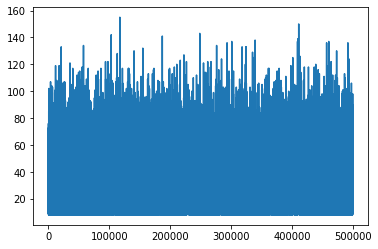

In [ ]:
from matplotlib import pyplot as plt

plt.plot(episode_rewards)
plt.show()

In [ ]:
print(weights_p)
print(weights_v)
print(weights_w)

[[-0.18391457 -0.06128667 -0.07670223 -0.00261032]
 [-0.07996113 -0.02843823 -0.05135856  0.00950934]]
[-0.00101025  0.00016359 -0.00081224  0.00013107]
[[-1.18091116e-04  5.93849495e-05 -1.12765597e-04  4.22317480e-05]
 [-2.73432374e-05  2.00744707e-05 -4.58229435e-05  1.56659479e-05]]
